## Attrition prediction model

#### This machine learning model helps predict attrition likelihood risk in organization.
The data pre-requesites for model includes, Organizational attributes, Behavioral metrics, attrition flag, survey data, Line of business data etc. More the relevant data available, better will be the prediction accuracy. We are currently using sample data for demonstration. When executing code with different data source, please perform necessary exploratory analysis and feature engineering for accurate results. 

In [5]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [6]:
# Ingest data
# Behavioral metrics data
data_behavioral = pd.read_csv('data\\metrics_denormalized.csv')
# Attrition Indicator
data_attrition = pd.read_csv('data\\attrition_indicator.csv')

In [7]:
data_behavioral.head()

,personid,date,profession,function,gender,comp_ratio,promoted_in_last_2years,salary_hike_pct,months_in_level_pctchange,months_in_company_pctchange,meeting_hours_pctchange_3month,mail_hours_pctchange_3month,workweekspan_hours_pctchange_3month,after_hours_pctchange_3month,external_network_size_pctchange_3month,internal_network_size_pctchange_3month,mgr_coaching_hours_pctchange_3month
0,ab12345,1/4/2022,Engineering,Program Manager,Male,1.0,Yes,10,24,50,20,10,6,-10,6,14,20
1,ab12346,1/4/2022,Engineering,Program Manager,Female,1.0,No,8,24,50,20,12,6,-5,6,14,30
2,ab12347,1/4/2022,Engineering,Program Manager,Female,1.0,Yes,6,24,50,20,14,6,5,6,14,40
3,ab12348,1/4/2022,Engineering,Program Manager,Male,1.0,No,5,24,50,20,10,6,10,6,14,30
4,ab12349,1/4/2022,Engineering,Program Manager,Male,1.2,Yes,6,24,50,20,16,6,-5,6,14,25


In [8]:
# Join dataframes
df = pd.merge(data_behavioral, data_attrition, on='personid', how='inner')

In [9]:
df.head()

,personid,date,profession,function,gender,comp_ratio,promoted_in_last_2years,salary_hike_pct,months_in_level_pctchange,months_in_company_pctchange,meeting_hours_pctchange_3month,mail_hours_pctchange_3month,workweekspan_hours_pctchange_3month,after_hours_pctchange_3month,external_network_size_pctchange_3month,internal_network_size_pctchange_3month,mgr_coaching_hours_pctchange_3month,attrition_indicator
0,ab12345,1/4/2022,Engineering,Program Manager,Male,1.0,Yes,10,24,50,20,10,6,-10,6,14,20,N
1,ab12346,1/4/2022,Engineering,Program Manager,Female,1.0,No,8,24,50,20,12,6,-5,6,14,30,N
2,ab12347,1/4/2022,Engineering,Program Manager,Female,1.0,Yes,6,24,50,20,14,6,5,6,14,40,N
3,ab12348,1/4/2022,Engineering,Program Manager,Male,1.0,No,5,24,50,20,10,6,10,6,14,30,N
4,ab12349,1/4/2022,Engineering,Program Manager,Male,1.2,Yes,6,24,50,20,16,6,-5,6,14,25,N


In [10]:
# Check shape of data
df.shape

(92, 18)

In [11]:
# Check field data types
df.dtypes

personid                                   object
date                                       object
profession                                 object
function                                   object
gender                                     object
comp_ratio                                float64
promoted_in_last_2years                    object
salary_hike_pct                             int64
months_in_level_pctchange                   int64
months_in_company_pctchange                 int64
meeting_hours_pctchange_3month              int64
mail_hours_pctchange_3month                 int64
workweekspan_hours_pctchange_3month         int64
after_hours_pctchange_3month                int64
external_network_size_pctchange_3month      int64
internal_network_size_pctchange_3month      int64
mgr_coaching_hours_pctchange_3month         int64
attrition_indicator                        object
dtype: object

In [12]:
# assess for empty values
df.isna().sum()

personid                                  0
date                                      0
profession                                0
function                                  0
gender                                    0
comp_ratio                                0
promoted_in_last_2years                   0
salary_hike_pct                           0
months_in_level_pctchange                 0
months_in_company_pctchange               0
meeting_hours_pctchange_3month            0
mail_hours_pctchange_3month               0
workweekspan_hours_pctchange_3month       0
after_hours_pctchange_3month              0
external_network_size_pctchange_3month    0
internal_network_size_pctchange_3month    0
mgr_coaching_hours_pctchange_3month       0
attrition_indicator                       0
dtype: int64

In [13]:
df.isnull().values.any()

False

In [14]:
# Analyse stats on dataframe
df.describe()

,comp_ratio,salary_hike_pct,months_in_level_pctchange,months_in_company_pctchange,meeting_hours_pctchange_3month,mail_hours_pctchange_3month,workweekspan_hours_pctchange_3month,after_hours_pctchange_3month,external_network_size_pctchange_3month,internal_network_size_pctchange_3month,mgr_coaching_hours_pctchange_3month
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,1.006630,5.771739,22.195652,61.195652,8.108696,2.282609,-0.576087,-11.043478,0.543478,4.358696,16.076087
std,0.077464,3.238176,7.577061,17.843791,18.625551,11.681982,16.244853,23.273299,19.423795,20.313251,24.311275
min,0.900000,0.000000,10.000000,42.000000,-40.000000,-30.000000,-40.000000,-100.000000,-60.000000,-40.000000,-40.000000
25%,0.950000,3.000000,16.000000,45.000000,10.000000,4.000000,4.000000,-20.000000,4.000000,10.000000,10.000000
50%,1.000000,6.000000,22.000000,55.000000,15.000000,5.000000,6.000000,2.000000,9.000000,12.000000,22.000000
75%,1.070000,8.000000,30.000000,72.000000,20.000000,7.000000,8.000000,3.000000,9.000000,15.000000,30.000000
max,1.200000,14.000000,30.000000,90.000000,22.000000,25.000000,20.000000,20.000000,14.000000,45.000000,60.000000


In [15]:
# Get distribution on attrition
df['attrition_indicator'].value_counts()

N    74
Y    18
Name: attrition_indicator, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='attrition_indicator', ylabel='count'>

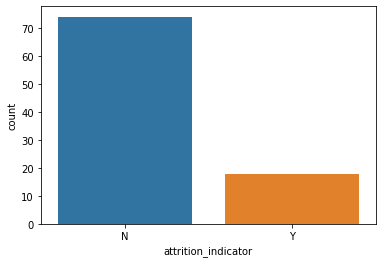

In [16]:
#Visualize attrition distribution 
sns.countplot(df['attrition_indicator'])

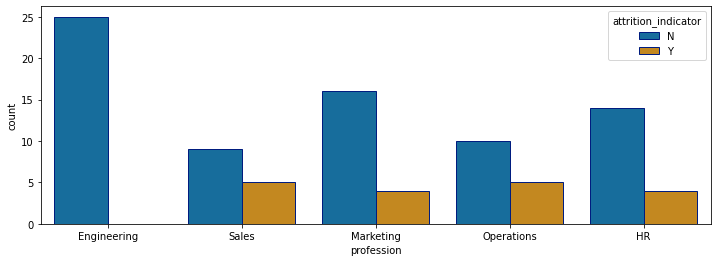

In [17]:
# Visualize the distribution by dprofession
fig_dimensions = (12, 4)
fig, ax = plt.subplots(figsize=fig_dimensions)

#ax = axis
sns.countplot(x='profession', hue='attrition_indicator', data = df, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

In [18]:
# Let's get sense of unique values in various columns
for column in df.columns:
    if df[column].dtype == object:
        print(str(column)) # + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('___________________________________________________________')

personid
ab12364    1
ab12372    1
ab12393    1
ab12433    1
ab12416    1
          ..
ab12431    1
ab12385    1
ab12401    1
ab12370    1
ab12435    1
Name: personid, Length: 92, dtype: int64
___________________________________________________________
date
1/4/2022    92
Name: date, dtype: int64
___________________________________________________________
profession
Engineering    25
Marketing      20
HR             18
Operations     15
Sales          14
Name: profession, dtype: int64
___________________________________________________________
function
Software Engineer        16
Market Research          12
Program Manager           9
Benefits                  8
Security Operations       8
Business Strategy         8
Payroll                   7
Account Executive         7
Service Operations        7
Technology Specialist     7
Recruitment               3
Name: function, dtype: int64
___________________________________________________________
gender
Male      51
Female    41
Name: gende

In [19]:
# As most values in some of these columns are unique, we can remove these coulmns. They won't be good predictive variables.
df = df.drop('personid', axis = 1) 
df = df.drop('date', axis = 1) 

<AxesSubplot:>

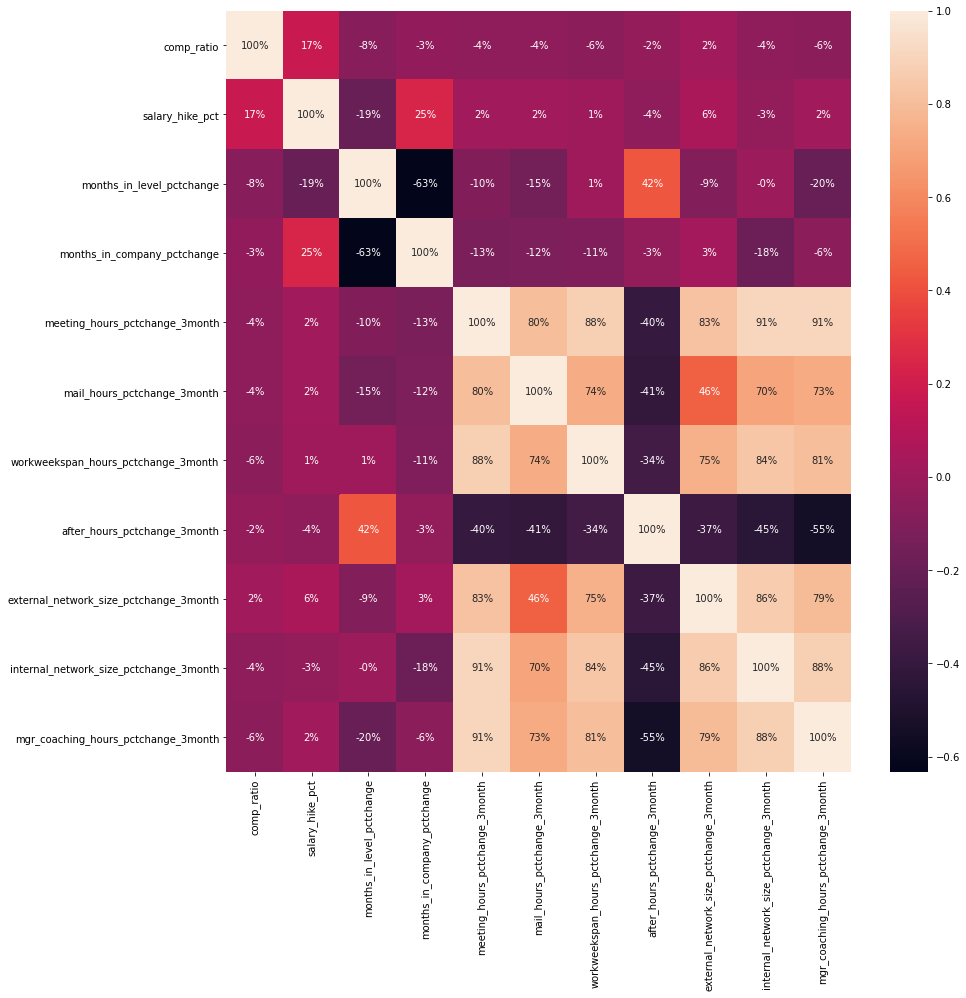

In [20]:
# Visualize correlation heat map
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

There are some variables with strong correlation values (either positive or negative). For now we are going to keep it as it is in demo environment, however later during production data execution, we will remove highly coorelated variables, as these extra variables will not add any predictive power. 

As Machine Learning models works with only numeric columns, we will need to convert non-numerical columns into numeric categorical columns. 

In [21]:
# Transform non-numeric categorical columns into numerical categorical columns

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

<ipython-input-21-2daf2ed6db55>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [22]:
df

,profession,function,gender,comp_ratio,promoted_in_last_2years,salary_hike_pct,months_in_level_pctchange,months_in_company_pctchange,meeting_hours_pctchange_3month,mail_hours_pctchange_3month,workweekspan_hours_pctchange_3month,after_hours_pctchange_3month,external_network_size_pctchange_3month,internal_network_size_pctchange_3month,mgr_coaching_hours_pctchange_3month,attrition_indicator
0,0,5,1,1.00,1,10,3,2,8,8,7,9,5,6,7,0
1,0,5,0,1.00,0,8,3,2,8,9,7,11,5,6,10,0
2,0,5,0,1.00,1,6,3,2,8,10,7,16,5,6,12,0
3,0,5,1,1.00,0,5,3,2,8,8,7,17,5,6,10,0
4,0,5,1,1.20,1,6,3,2,8,12,7,11,5,6,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1,4,1,1.05,0,8,2,6,5,3,7,7,10,7,9,0
88,1,4,0,1.06,0,6,2,5,5,3,7,4,10,11,11,0
89,1,4,0,0.94,0,3,2,5,5,3,7,3,10,10,13,0
90,1,4,1,0.96,0,6,2,5,5,3,7,2,10,9,16,0


In [23]:
# Split data into predicting variables and label
X = df.iloc[:, 0:df.shape[1]-1].values 
X

array([[ 0.,  5.,  1., ...,  5.,  6.,  7.],
       [ 0.,  5.,  0., ...,  5.,  6., 10.],
       [ 0.,  5.,  0., ...,  5.,  6., 12.],
       ...,
       [ 1.,  4.,  0., ..., 10., 10., 13.],
       [ 1.,  4.,  1., ..., 10.,  9., 16.],
       [ 1.,  4.,  0., ..., 10.,  7., 15.]])

In [24]:
Y = df.iloc[:, df.shape[1]-1:df.shape[1]].values

Now we will spilt data into train and test set for model training and testing

In [25]:
# Train:Test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

As we have split data into train and test, we will try various machine learning algorithms, test their accuracy, and select the best one.  

We will start with Random Forest classification alogorithm. 

In [26]:
# Define the model and fit on training data
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)
# Check the accuracy on the training data
print('Model Accuracy on Training data = {}'.format( forest.score(X_train, Y_train)))

Model Accuracy on Training data = 0.9863013698630136


<ipython-input-26-80525f585783>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, Y_train)


In [27]:
# Let's verify the confusion matrix and accuracy for the model on the test data

cm = confusion_matrix(Y_test, forest.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Accuracy on test data = {}'.format(  (TP + TN) / (TP + TN + FN + FP)))

[[15  0]
 [ 0  4]]
Model Accuracy on test data = 1.0


Please remember we are on running model on demo data currently. Accuracy will vary on production data. 

Let's turn our attention to feature of significance (important features) identified by model. 

In [30]:
# Return the feature importances (the higher, the more important the feature).
importances = pd.DataFrame({'feature':df.iloc[:, 0:df.shape[1]-1].columns, 
                            'importance':np.round(forest.feature_importances_,3)})
important_features = importances.sort_values('importance',ascending=False).set_index('feature')
important_features

,importance
feature,
mgr_coaching_hours_pctchange_3month,0.388
workweekspan_hours_pctchange_3month,0.148
mail_hours_pctchange_3month,0.147
meeting_hours_pctchange_3month,0.137
internal_network_size_pctchange_3month,0.117
after_hours_pctchange_3month,0.041
months_in_company_pctchange,0.016
comp_ratio,0.006
profession,0.000


<AxesSubplot:xlabel='feature'>

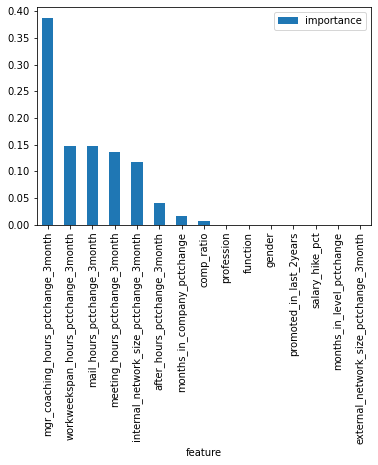

In [31]:
important_features.plot.bar()

As per current data feed to model mgr_coaching_hours_pctchange_3month, workweekspan_hours_pctchange_3month, and mail_hours_pctchange_3month are the top 3 important features. 

Important features will change from dataset to dataset, from organization to organization. 